# 04. 분류

### [01] 분류(Classification)의 개요

- 분류(Classification) : 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 떄 미지의 레이블 값을 예측하는 것
- 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘을 인지한 뒤 새롭게 관측된 데이터에 대한 레이블을 판별하는 것


분류를 구현하는 다양한 머신러닝 알고리즘

- 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)
- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
- 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)
- 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘
- 심층 연결 기반의 신경망(Neural Network)
- 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

앙상블 방법 (Ensemble Method)
- 정형 데이터의 예측 분석 영역에서 앙상블이 매우 높은 예측 성능을 보임
- 배깅(Bagging)과 부스팅(Boosting) 방식

결정트리
- 매우 쉽고 유연하게 적용될 수 있는 알고리즘
- 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음
- 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합(overfitting)이 발생해 반대로 예측 성능이 저하될 수 있다는 단점
- 앙상블은 매우 많은 여러 개의 약한 학습기(예측 성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시킴. 결정 트리가 좋은 약한 학습기가 됨

### [2] 결정 트리 (Decision Tree)
- ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내는 트리(Tree) 기반의 분류 규칙을 만드는 것
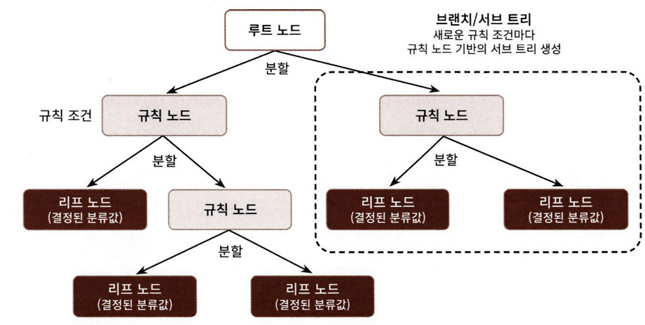

- 규칙 조건을 만들 때마다 규칙 노드가 만들어짐
- 많은 규칙이 있으면 분류를 결정하는 방식이 더욱 복잡해지므로 과적합으로 이어지기 쉬움
- 트리의 길이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높아짐

- 가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면, 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함.
- 어떻게 트리를 분할할 것인가가 중요한데, 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요함

정보의 균일도
- 데이터를 구분하는 데 필요한 정보의 양에 영향을 미침
- 결정 노드 : 정보 균일도가 높은 데이터 세트를 먼저 선택 -> 서브 데이터 세트 생성 -> 자식 트리 생성
- 정보 이득(Information Gain) 지수 = 1 - 엔트로피 지수 : 결정 트리는 정보 이득이 높은 속성을 기준으로 분할함
- 지니 계수 : 낮을수록 데이터 균일도가 높은 것 -> 지니 계수가 낮은 속성을 기준으로 분할함

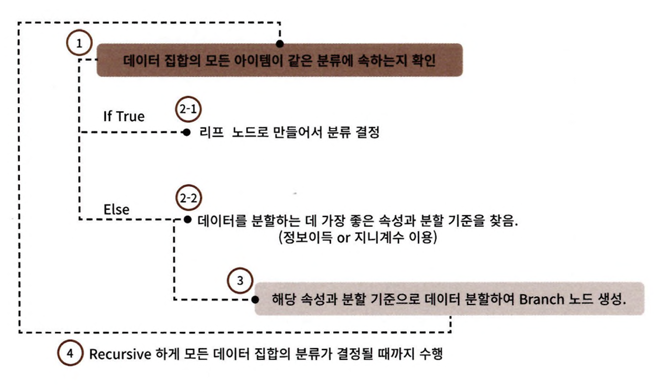

### [결정 트리 모델의 특징]
장점
- '균일도'라는 룰을 기반으로 하고 있어 알고리즘이 쉽고 직관적
- 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음

단점
- 과적합으로 알고리즘 성능이 떨어진다
- 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝이 필요

### [결정 트리 파라미터]
분류를 위한 DecisionTreeClassifier 클래스
- min_samples_split
- min_samples_leaf
- max_features
- max_depth
- max_leaf_nodes

### [결정 트리 모델의 시각화]
Graphviz 패키지
- 결정 트리 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는지 시각적으로 보여줌
- export_graphviz() : 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 보여줌

In [7]:
# Graphviz 패키지 다운로
!apt-get install graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [8]:
import graphviz

Graphviz를 이용해 붓꽃 데이터 세트에 결정 트리를 적용할 때 어떻게 서브 트리가 구성되고 만들어지는 시각화하기

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state=11)

# DecisionTreeClassifer 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

사이킷런의 트리 모듈 중 export_graphviz() 함수
- 인자 : 학습이 완료된 estimator, output 파일 명, 결정 클래스의 명칭, 피처의 명칭

In [10]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file = "tree.dot", class_names = iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

생성된 출력 파일 'tree.dot'을 다음과 같이 Graphviz의 파이썬 래퍼 모듈을 호출해 결정 트리의 규칙을 시각적으로 표현할 수 있음

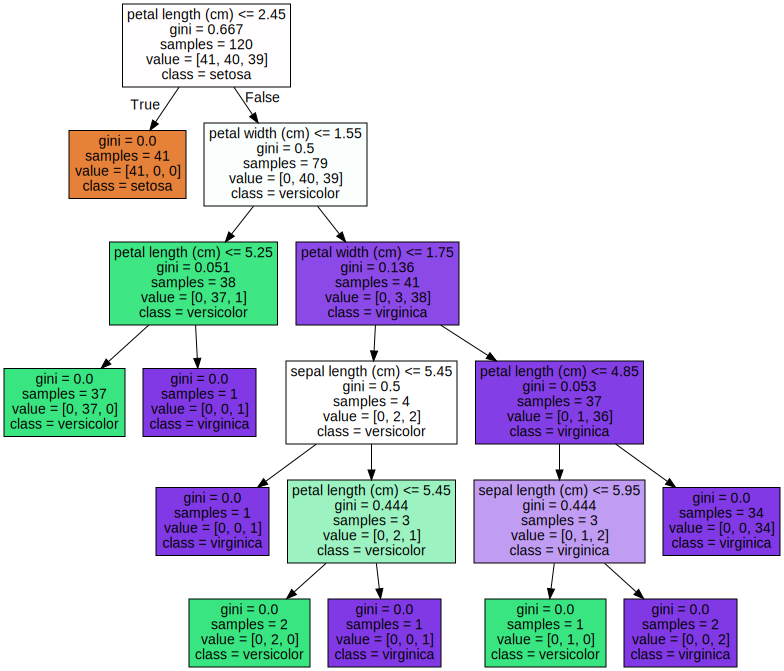

In [12]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

리프 노트
- 더 이상 자식 노드가 없는 노드
- 최종 클래스(레이블) 값이 결정되는 노드
- 리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조거능 충족하면 됨

브랜치 노드
- 자식 노드가 있는 노드
- 자식 노드를 만들기 위한 분할 규칙 조건을 가짐

노드 내에 기술된 지표의 의미
- 피처의 조건 (petatl length(cm) <= 2.45) : 자식 노드를 만들기 위한 규칙 조건, 조건이 없으면 리프 노드
- gini : 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수
- samples : 현 규칙에 해당하는 데이터 건수
- value = [] : 클래스 값 기반의 데이터 건수

파라미터 변경에 따른 트리 변화
- max_depth : 결정 트리의 최대 트리 깊이를 제어
- min_samples_split : 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수

DecisionTreeClassifier 객체의 feature_importances_ 속성
- 사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할을 제공
- ndarray 형태로 값을 반환, 피처 순서대로 값이 할당됨

붓꽃 데이터 세트에서 피처별로 결정 트리 알고리즘에서 중요도를 추출

Featrue importances : 
[0.025 0.    0.555 0.42 ]
sepal length (cm) :  0.025
sepal width (cm) :  0.000
petal length (cm) :  0.555
petal width (cm) :  0.420


<Axes: >

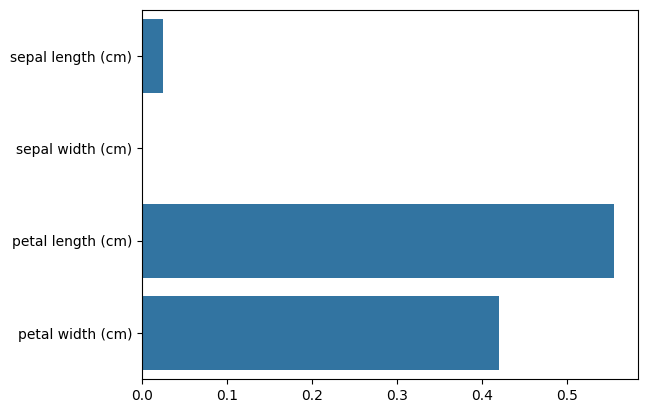

In [13]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('Featrue importances : \n{0}'.format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1: .3f}'.format(name, value))

# feature importance 를 column 별로 시각화하기
sns.barplot(x = dt_clf.feature_importances_, y=iris_data.feature_names)

petal_length 의 피처 중요도가 가장 높음

### [결정 트리 과적합(Overfitting)]
사이킷런의 make_classification() 함수
- 분류를 위한 테스트용 데이터를 쉽게 만들기

make_classification() 호출 시 반환되는 객체
- 피처 데이터 세트와 클래스 레이블 데이터 세트

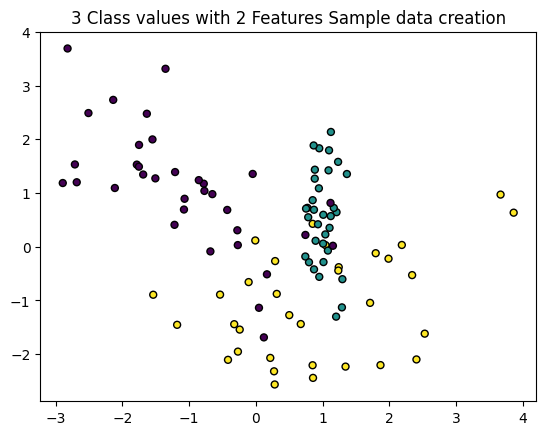

In [15]:
# 분류를 위한 임의의 데이터 세트를 만들기

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각회, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')


-> 각 피처가 X, Y축으로 나열된 2차원 그래프, 3개의 클래스 값 구분은 색깔로 함

X_features와 y_labels 데이터 세트를 기반으로 결정 트리 학습하기
- 첫 번째 학습 시에는 결정 트리 생성에 별다른 제약이 없도록 결정 트리의 하이퍼 파라미터를 디폴트로 한 뒤, 결정 트리 모델이 어떠한 결정 기준을 가지고 분할하면서 데이터를 분류하는지 확인하기

visualize_boundary() 생성
- 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타내 모델의 데이터 세트를 예측 분류하는 것을 시각화함

In [17]:
# visualize_boundary() 생성

import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

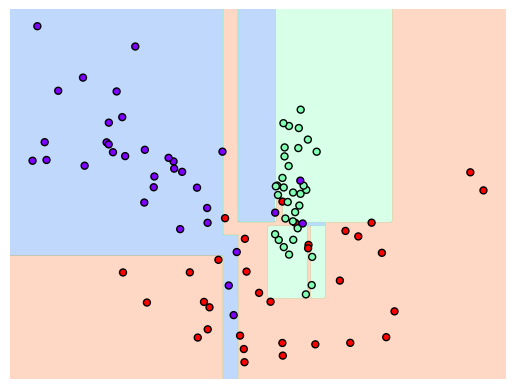

In [18]:
# 결정 트리 생성에 별다른 제약이 없도록
# 하이퍼 파라미터가 디폴트인 Classifier를 학습하고 결정 기준 경계를 시각화하기

from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(random_state = 156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- -> 결정 트리의 기본 하이퍼 파라미터 설정은 리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 엄격한 분할 기준
- -> 결정 기준 경계가 많아지고 복잡해짐
- -> 예측 정확도가 떨어짐

6개 이하의 데이터는 리프 노드를 생성할 수 있도록 리프 노드 생성 규칙을 완화한 뒤, 하이퍼 파라미터를 변경해 어떻게 결정 기준 경계가 변하는지 살펴보기

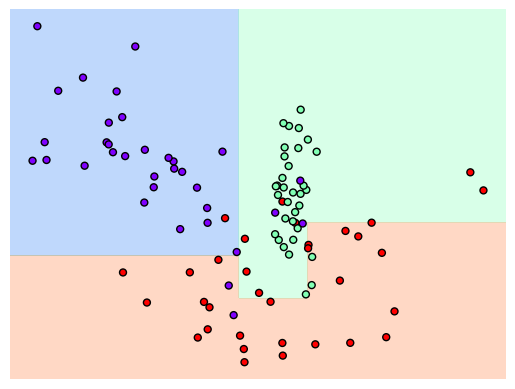

In [20]:
# min_samples_leaf = 6 으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6, random_state = 156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

-> 좀 더 일반화된 분류 규칙에 따라 분류됐음

### [결정 트리 실습 - 사용자 행동 인식 데이터 세트]

[Human Activity Recognition Using Smartphones Data Set](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones)

'features.txt' 파일 내의 피처 인덱스와 피처명 확인하기

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('/content/drive/MyDrive/2024-2 ESAA/Data/features.txt', sep='\s+', header=None, names=['column_index','column_name'])

# 피처명 index를 제거하고 피처명만 리스트 객체로 생성한 뒤 샘플로 10개 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


-> 피처명 : 인체의 움직임과 관련된 속성의 평균/표준편차가 X,Y,Z 축 값으로 돼 있음

In [29]:
# 중복 피처명 확인 -> 42개 피처명 중복
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [30]:
# 원본  피처명에 _1 또는 _2 를 추가로 부여하여 새로운 피처명을 반환하는 함수 생성

def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)

  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [32]:
import pandas as pd

def get_human_dataset():

    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('/content/drive/MyDrive/2024-2 ESAA/Data/features.txt', sep='\s+',
                                  header = None, names = ['column_index', 'column_name'])

    # 중복된 피처명으 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/2024-2 ESAA/Data/X_train.txt', sep = '\s+', names=feature_name)
    X_test = pd.read_csv('/content/drive/MyDrive/2024-2 ESAA/Data/X_test.txt', sep = '\s+', names=feature_name)

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    y_train = pd.read_csv('/content/drive/MyDrive/2024-2 ESAA/Data/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/2024-2 ESAA/Data/y_test.txt', sep='\s+', header=None, names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [33]:
# 학습 데이터 세트 : 7352개의 레코드로 561개의 피처

print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [34]:
# 학습용 피처 데이터 세트를 간략하게 보기
# 칼럼의 대부분이 움직임 위치와 관련된 속성임
# 레이블 값은 1,2,3,4,5,6의 6개 값
# 분포도는 특정 값으로 왜곡되지 않고 비교적 고르게 분포
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [35]:
# 동작 예측 분류 수행
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'. format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


결정 트리의 트리 깊이가 예측 정확도에 주는 영향 살펴보기
- GridSearchCV를 이용
- max_depth 값을 변화시키면서 예측 성능 확인
- max_samples_split = 16 고정
- 교차 검증은 5개 세트

---



In [37]:
from sklearn.model_selection import GridSearchCV

params={'max_depth':[6,8,10,12,16,20,24], 'min_samples_split':[16]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [38]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
# mean_test_score : 5개의 CV 세트에서 검증용 데이터 세트의 정확도 평균 수치
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


-> 8일 때 mean이  최대이므로 8일때 가장 좋은 성능

결정 트리는 더 완벽한 규칙을 학습 데이터 세트에 적용하기 위해 노드를 지속적으로 분할하면서 깊어지고 더욱 더 복잡한 모델이 됨 -> 과적합으로 성능 저하 유발

In [39]:
# 별도의 테스트 데이터 세트에서의 결정트리 정확도 측정

max_depth = [6,8,10,12,16,20,24]

# max_depth값을 변화시키면서 그때마다 학습과 테스트 데이터 세트에서의 예측 성능 측정
for depth in max_depth:
  dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


In [40]:
# 정확도 성능 튜닝
# max_depth와 min_samples_split을 같이 변경

params = {
    'max_depth':[8,12,16,20],
    'min_samples_split':[16,24]
}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [41]:
# 별도 분리된 테스트 데이터 세트에 해당 하이퍼 파라미터 적용

best_df_clf = grid_cv.best_estimator_
pred1=best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


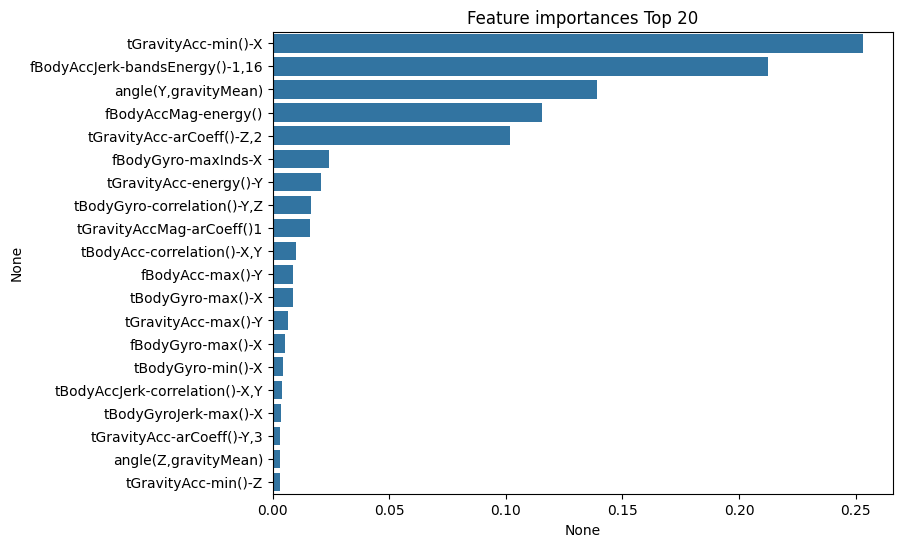

In [42]:
# 중요도가 높은 순으로 Top20 피처를 막대그래프로 표현
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 표현하기 위해 시리즈 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

# 중요도값 순으로 Serires 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()
